# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | brookings
Processing Record 12 of Set 1 | elko
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | brazzaville
Processing Record 15 of Set 1 | kumertau
Processing Record 16 of Set 1 | sumbawa besar
Processing Record 17 of Set 1 | praya
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | severo-yeniseyskiy
Processing Record 20 of Set 1 | itaueira
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({'City': [i['City'] for i in city_data],
                            'Lat': [i['Lat'] for i in city_data],
                            'Lng': [i['Lng'] for i in city_data],
                            'Max Temp': [i['Max Temp'] for i in city_data],
                            'Humidity': [i['Humidity'] for i in city_data],
                            'Cloudiness': [i['Cloudiness'] for i in city_data],
                            'Wind Speed': [i['Wind Speed'] for i in city_data],
                            'Country': [i['Country'] for i in city_data],
                            'Date': [i['Date'] for i in city_data]
                            })
# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-17.58,86,30,4.14,GL,1730235487
1,ushuaia,-54.8000,-68.3000,6.81,65,75,11.83,AR,1730235488
2,grytviken,-54.2811,-36.5092,0.24,77,68,4.04,GS,1730235489
3,mount isa,-20.7333,139.5000,25.87,29,4,2.57,AU,1730235490
4,edinburgh of the seven seas,-37.0676,-12.3116,13.95,79,3,8.48,SH,1730235491


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-17.58,86,30,4.14,GL,1730235487
1,ushuaia,-54.8000,-68.3000,6.81,65,75,11.83,AR,1730235488
2,grytviken,-54.2811,-36.5092,0.24,77,68,4.04,GS,1730235489
3,mount isa,-20.7333,139.5000,25.87,29,4,2.57,AU,1730235490
4,edinburgh of the seven seas,-37.0676,-12.3116,13.95,79,3,8.48,SH,1730235491


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

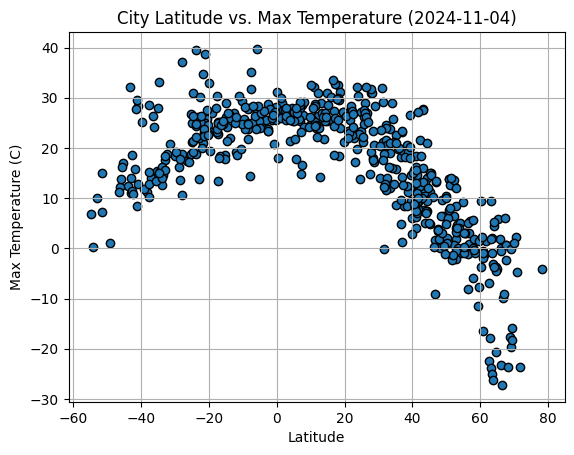

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors = 'black')

# Incorporate the other graph properties (labels,title, grid, etc.)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

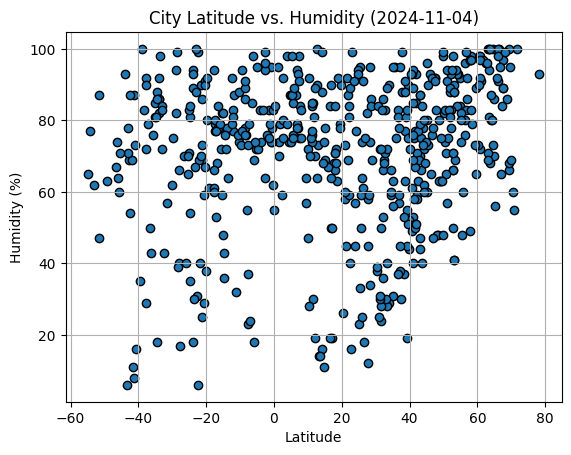

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors = 'black')

# Incorporate the other graph properties (labels,title, grid, etc.)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

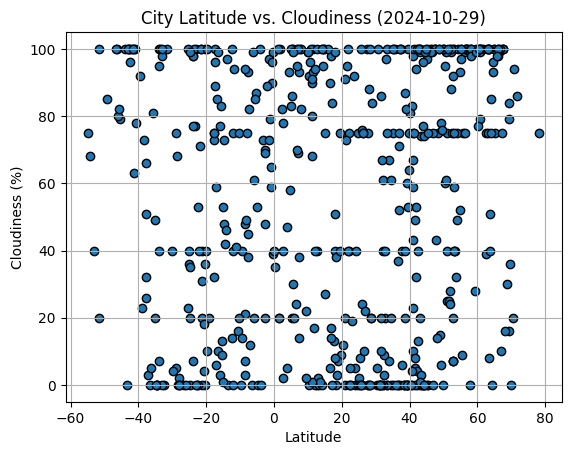

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors = 'black')

# Incorporate the other graph properties (labels,title, grid, etc.)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

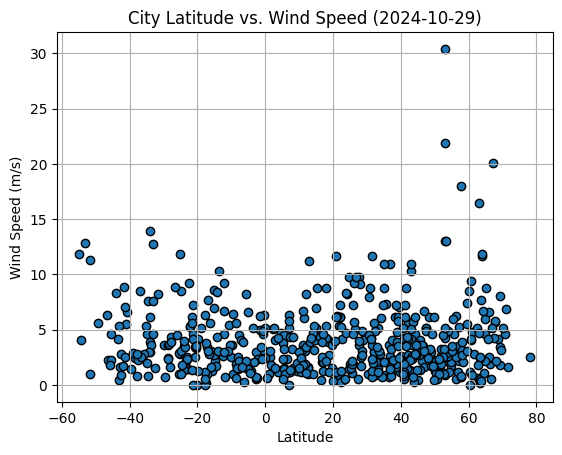

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors = 'black')

# Incorporate the other graph properties (labels,title, grid, etc.)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def create_linear_regression(x,y):

# Error Handling for Linear Regression correlation
    try:
        
        # Generate correlation value using scipy module
        correlation = st.pearsonr(x,y)
        print(f'The r^2-value is: {round(correlation[0],2)}')
        
        # Generate linear regression values using scipy module
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
        regress_values = list(map(lambda z: z*slope +intercept,x))

        # Generate linear regression equation in string format
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        # Build the scatter plot and incorporate linear regression line with annotation.
        plt.scatter(x,y)
        plt.plot(x,regress_values,"r-")
        plt.annotate(line_eq,((x.max()-x.min())*.05 + x.min(),(y.max()-y.min())/2 + y.min()),fontsize=15,color="red")
        
        # Incorporate the other graph properties (labels,title, etc.)
        plt.xlabel('Latitude')
        plt.ylabel(f'{y.name}')
        plt.title(f'Latitude vs. {y.name}')

        # Show plot
        plt.show()
    except:
        print('Error found')



In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-17.58,86,30,4.14,GL,1730235487
5,jiuquan,39.7432,98.5174,6.01,44,75,1.13,CN,1730235492
6,wailua homesteads,22.0669,-159.3780,27.29,84,40,6.17,US,1730235494
10,brookings,44.3114,-96.7984,14.00,72,0,4.63,US,1730235485
11,elko,41.0002,-115.5012,3.97,53,98,4.02,US,1730235499


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,6.81,65,75,11.83,AR,1730235488
2,grytviken,-54.2811,-36.5092,0.24,77,68,4.04,GS,1730235489
3,mount isa,-20.7333,139.5000,25.87,29,4,2.57,AU,1730235490
4,edinburgh of the seven seas,-37.0676,-12.3116,13.95,79,3,8.48,SH,1730235491
7,port-aux-francais,-49.3500,70.2167,1.00,63,85,5.57,TF,1730235495


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.85


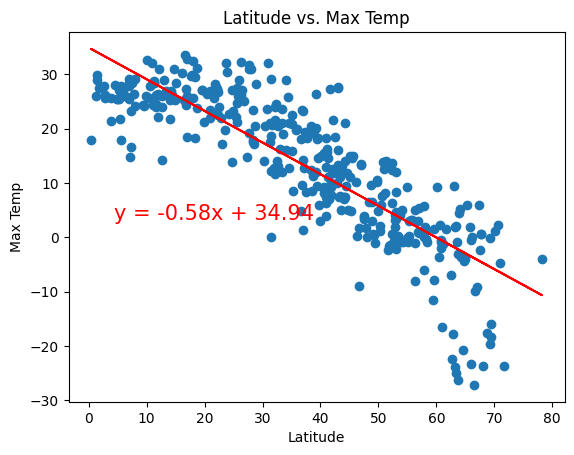

In [37]:
# Linear regression on Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


The r^2-value is: 0.61


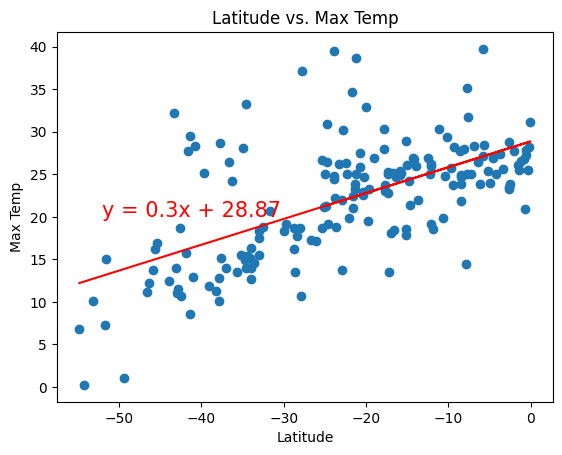

In [38]:
# Linear regression on Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** The plot indicates there is a medium positive correlation between latitude and max temperature in the Southern Hemisphere and a high negative correlation between latitude and max temperature in the Northern Hemisphere. This means that max temperature generally increases as the latitude moves from -50 to 0 in the Southern Hemisphere and max temeperature generally increaseses as latitude moves from 0 to 80 in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.21


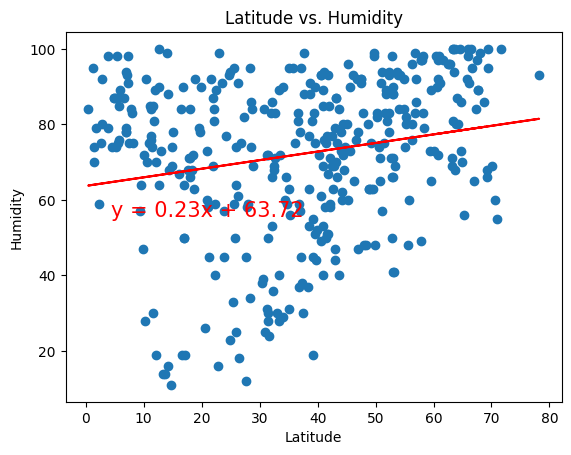

In [39]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r^2-value is: 0.15


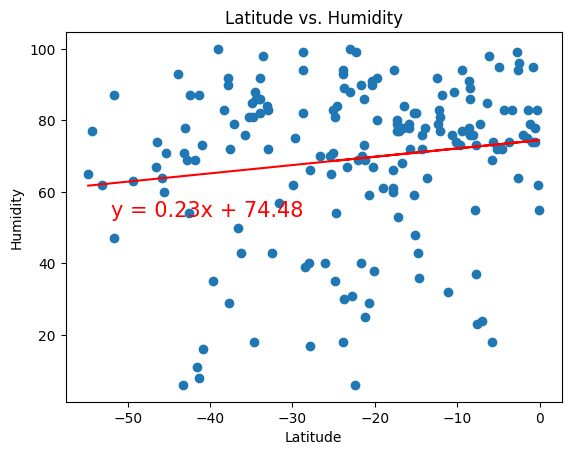

In [40]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The scatter plot indicates that there is a very low positive correlation between latitude and humidity in both the Northern and Southern Hemispheres. Essentially, there is little to no correlation between the two attributes. This is evident from the widely dispersed data points above and below the linear regression lines in the plots.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.18


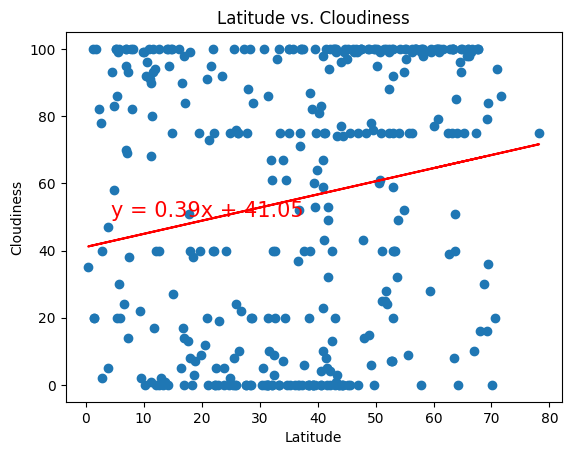

In [41]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r^2-value is: -0.09


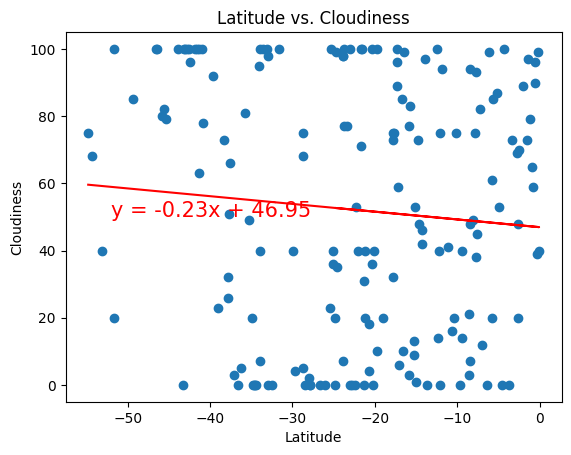

In [10]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The scatter plot indicates that there is a very low negative correlation between latitude and cloudiness in the Southern Hemisphere and a very low positive correlation between latitude and cloudiness in the Northern Hemisphere. Essentially, there is little to no correlation between the two attributes. Like above, this is evident from the widely dispersed data points in the plot.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.12


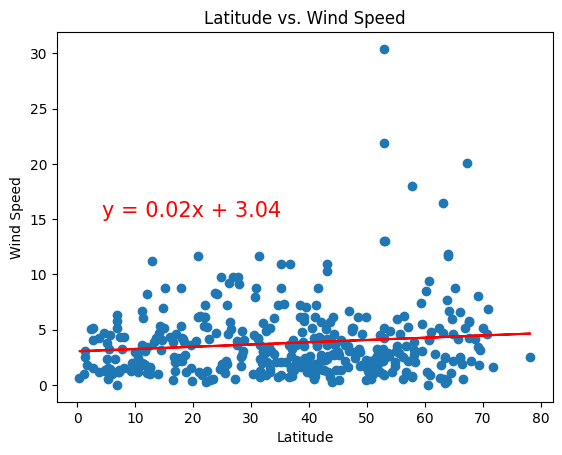

In [42]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])


The r^2-value is: -0.2


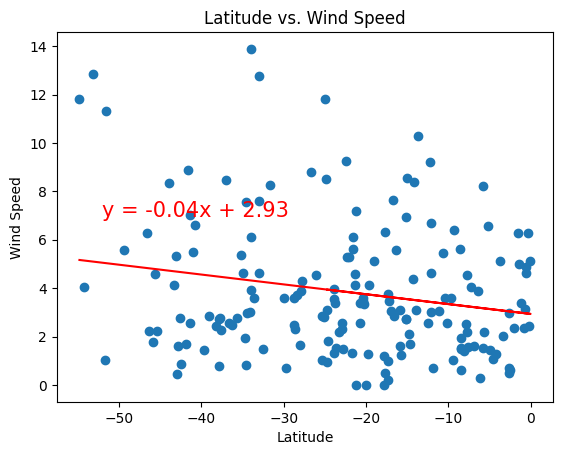

In [43]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The scatter plot indicates that there is a very low negative correlation between latitude and wind in the Southern Hemisphere. Thus, there are a variety of locations with different wind speeds, but similar latitudes.